In [16]:
import pandas as pd 
import numpy as np 
import json 

fname = '/home/azureuser/localfiles/code/slm-finetuning/fc-finetune-hf/src/data/fc_commands.json'

with open(fname, 'r') as f:
    data = json.load(f)



In [17]:
args_investigator = {}

for fn in data: 
    args_investigator[fn] = {}
    for arg in data[fn]['args']:
        # Convert the set of keys to a frozenset, which is immutable and can be used as a key
        keys = frozenset(arg.keys())
        args_investigator[fn][keys] = args_investigator[fn].get(keys, 0) + 1


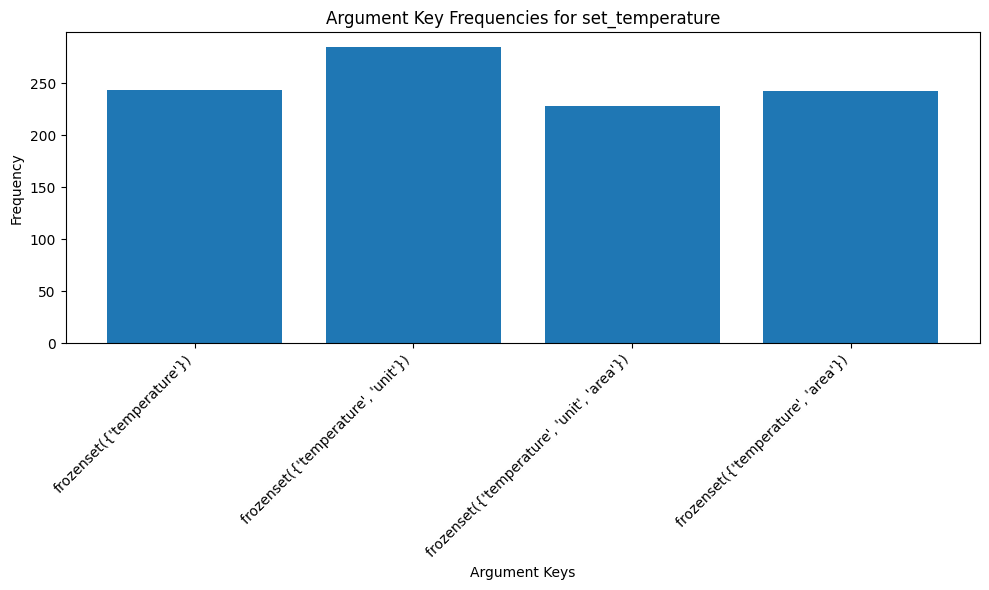

Function: set_temperature
{frozenset({'temperature'}): 244, frozenset({'temperature', 'unit'}): 285, frozenset({'temperature', 'unit', 'area'}): 228, frozenset({'temperature', 'area'}): 243}


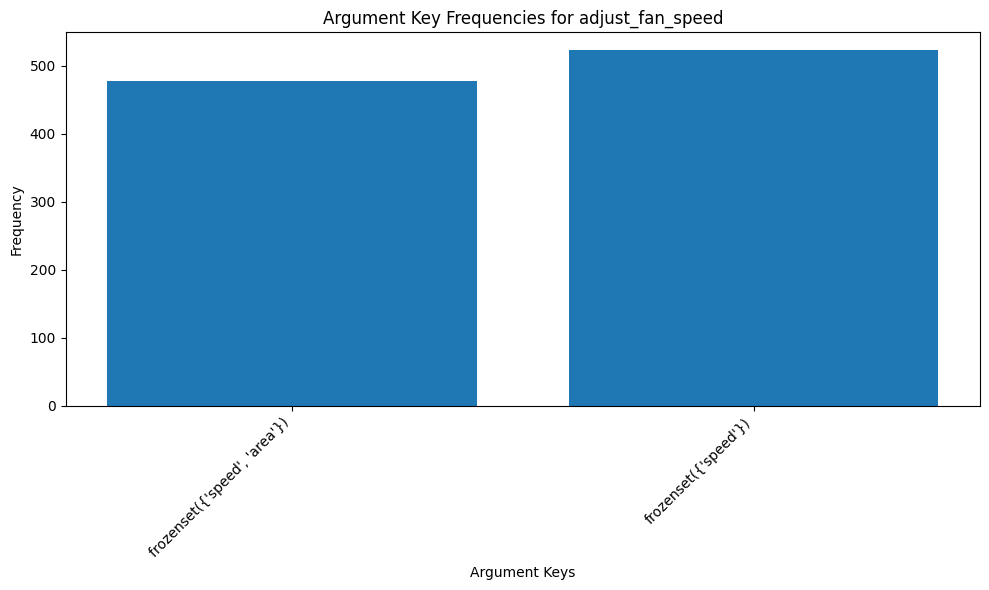

Function: adjust_fan_speed
{frozenset({'speed', 'area'}): 477, frozenset({'speed'}): 523}


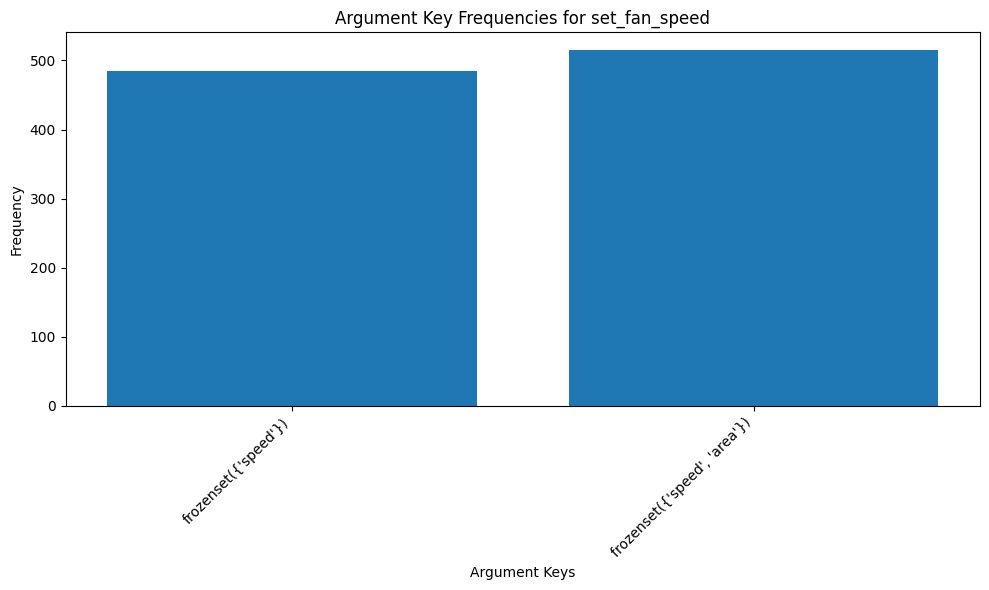

Function: set_fan_speed
{frozenset({'speed'}): 485, frozenset({'speed', 'area'}): 515}


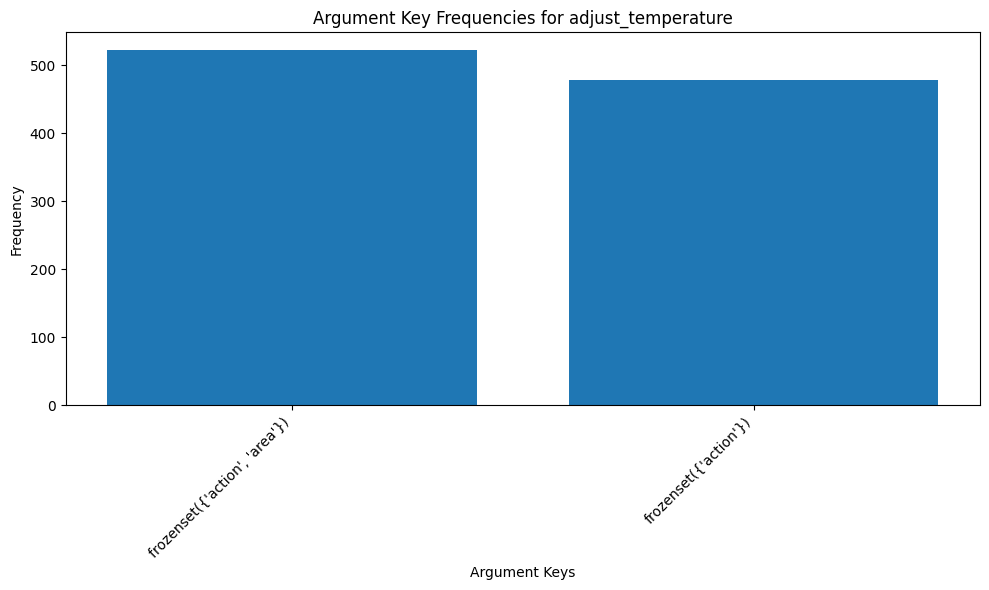

Function: adjust_temperature
{frozenset({'action', 'area'}): 522, frozenset({'action'}): 478}


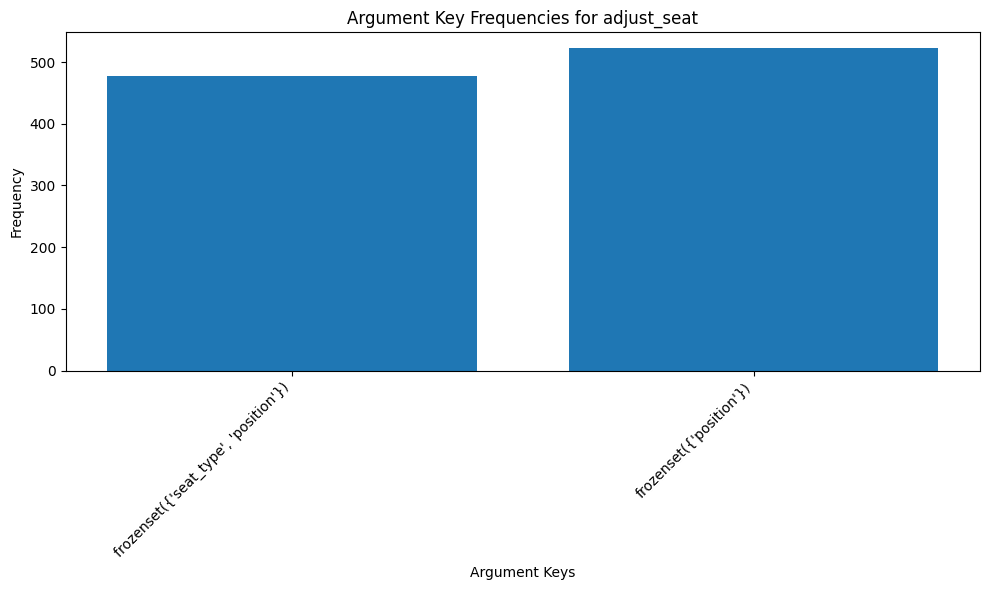

Function: adjust_seat
{frozenset({'seat_type', 'position'}): 478, frozenset({'position'}): 522}


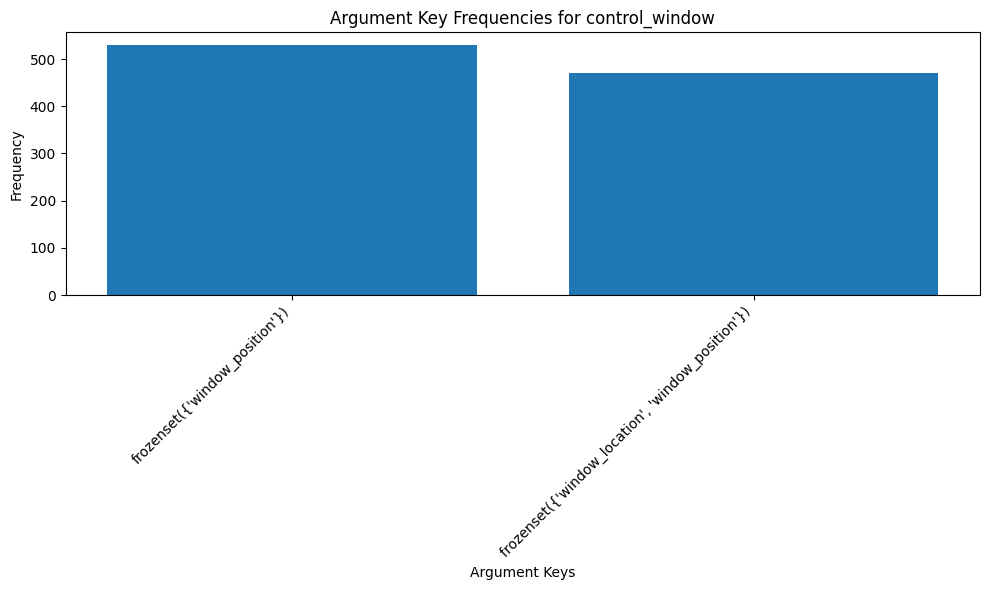

Function: control_window
{frozenset({'window_position'}): 530, frozenset({'window_location', 'window_position'}): 470}


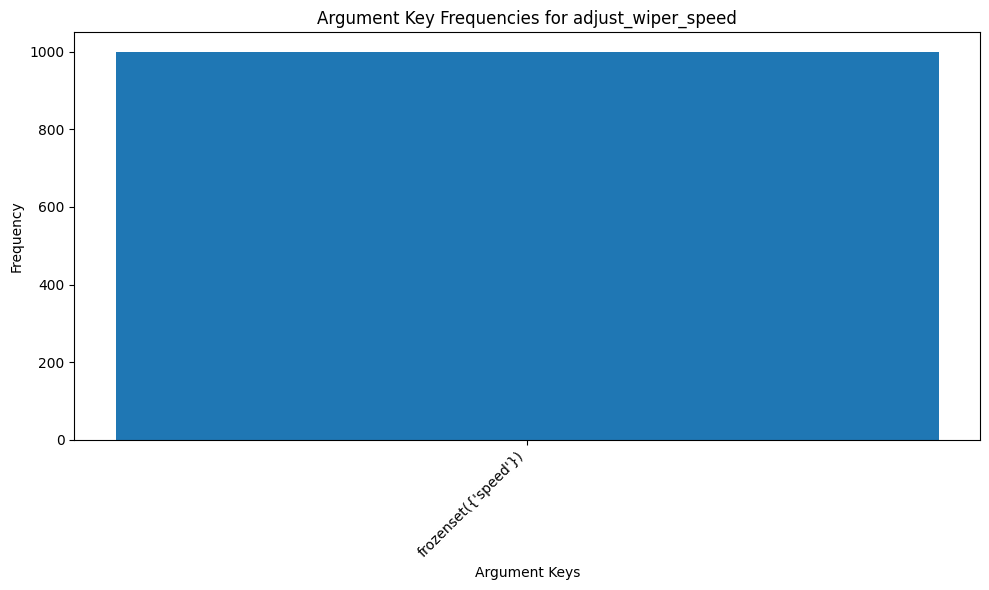

Function: adjust_wiper_speed
{frozenset({'speed'}): 1000}


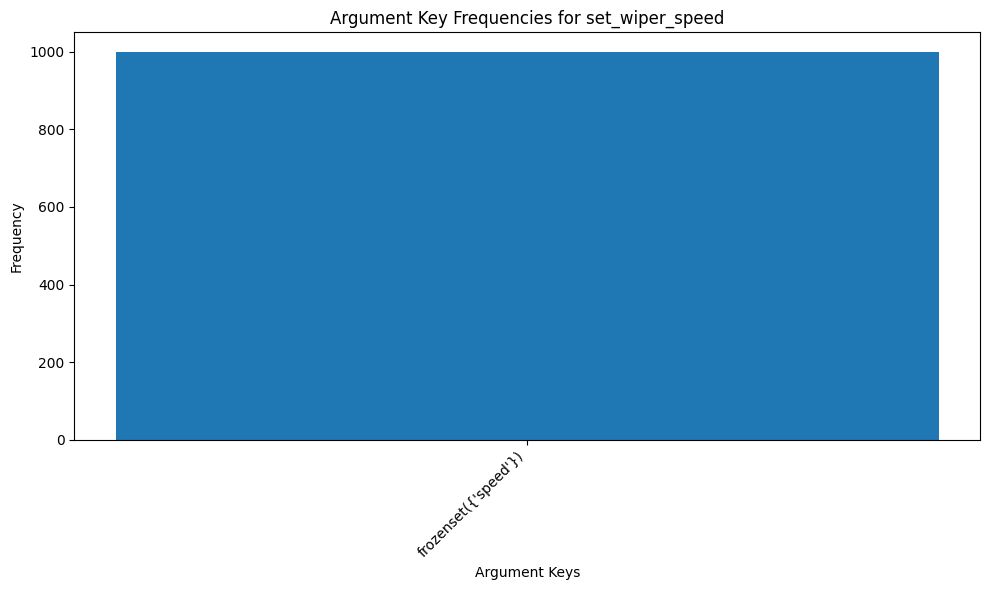

Function: set_wiper_speed
{frozenset({'speed'}): 1000}


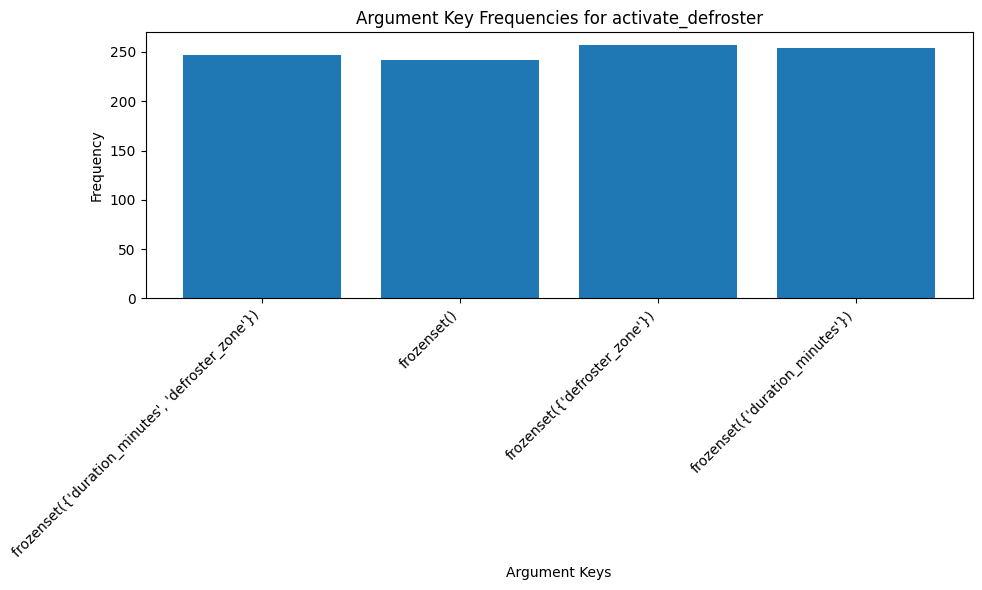

Function: activate_defroster
{frozenset({'duration_minutes', 'defroster_zone'}): 247, frozenset(): 242, frozenset({'defroster_zone'}): 257, frozenset({'duration_minutes'}): 254}


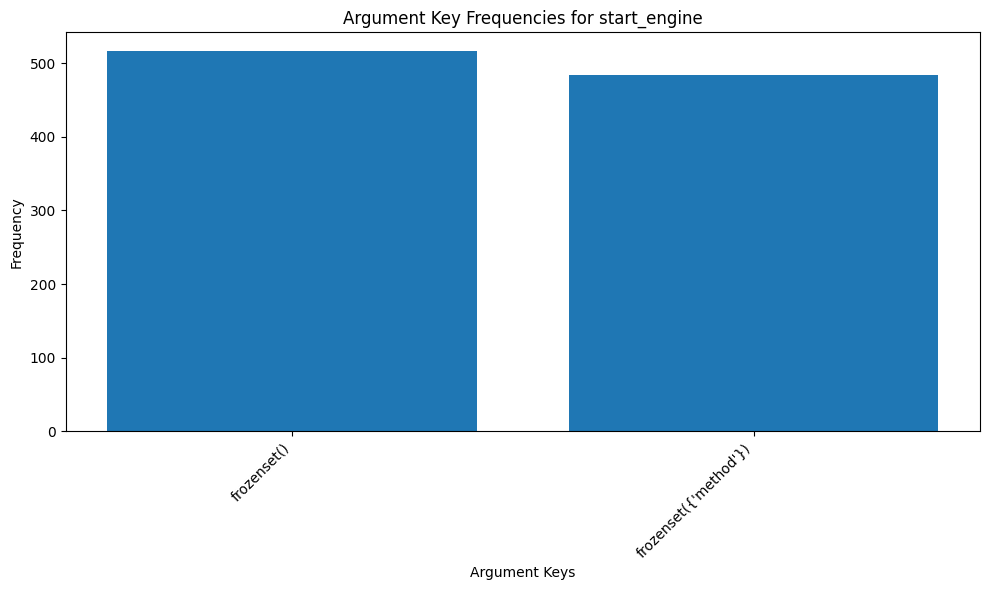

Function: start_engine
{frozenset(): 516, frozenset({'method'}): 484}


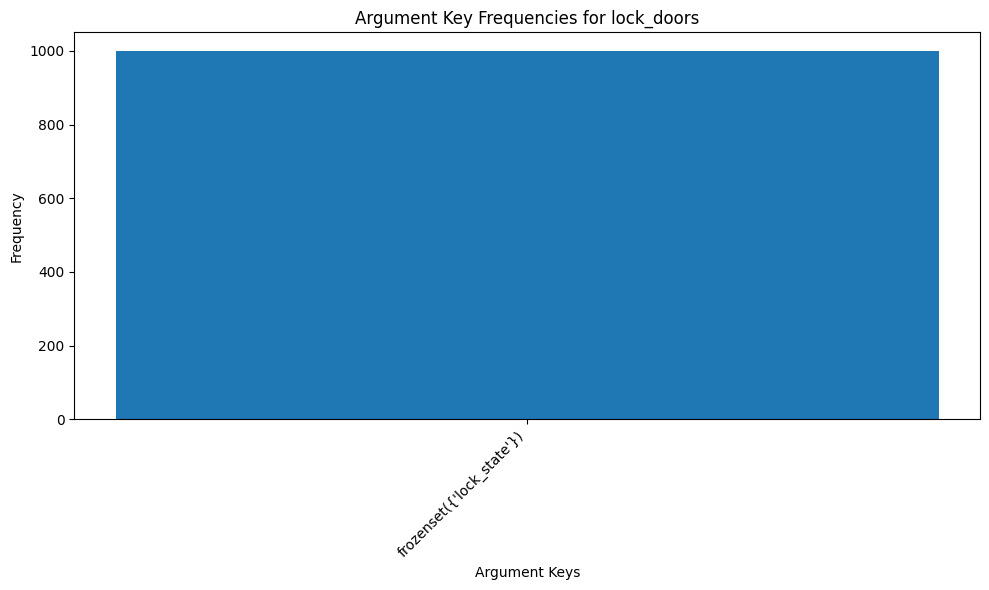

Function: lock_doors
{frozenset({'lock_state'}): 1000}


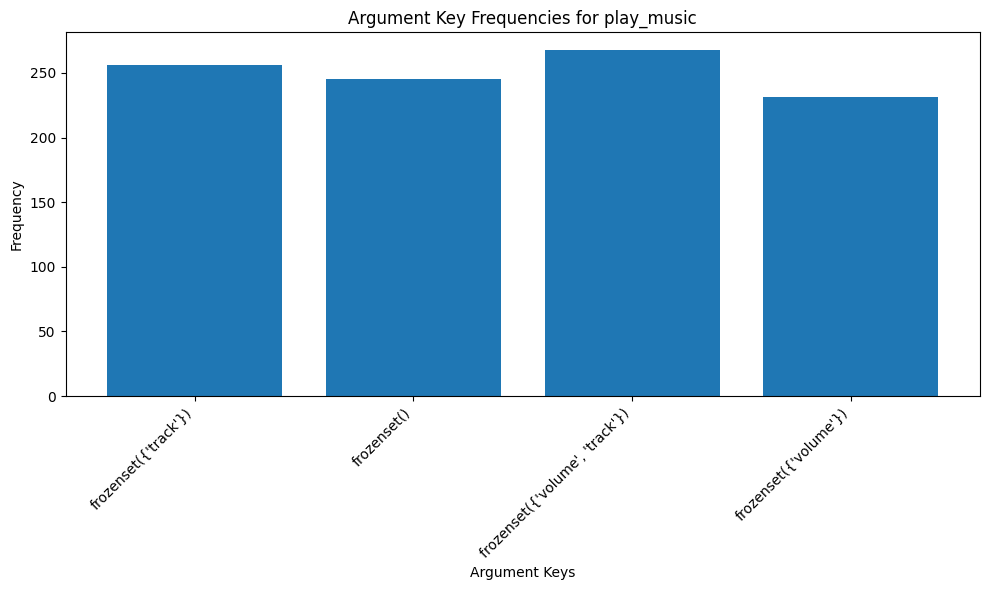

Function: play_music
{frozenset({'track'}): 256, frozenset(): 245, frozenset({'volume', 'track'}): 268, frozenset({'volume'}): 231}


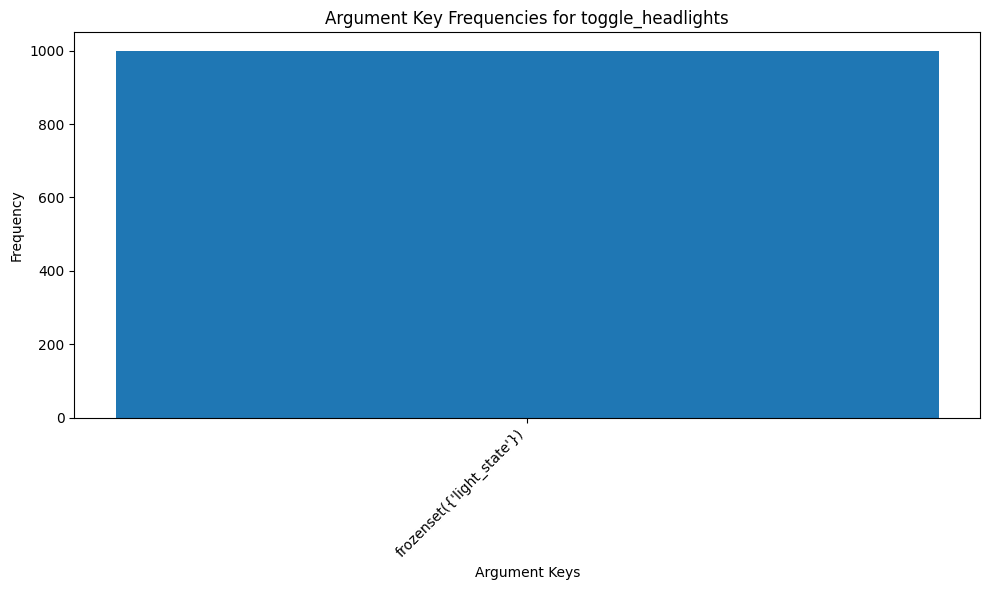

Function: toggle_headlights
{frozenset({'light_state'}): 1000}


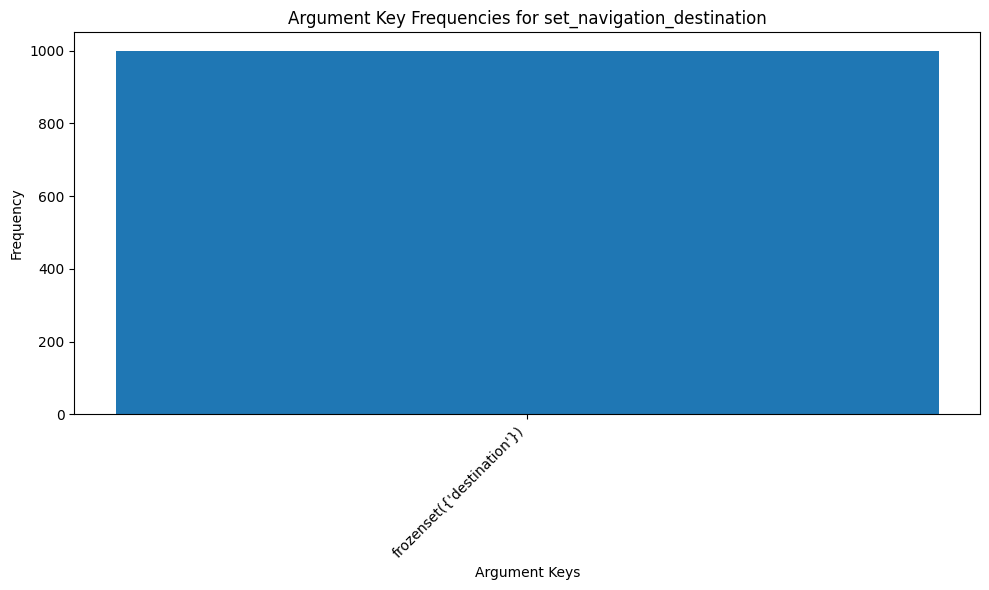

Function: set_navigation_destination
{frozenset({'destination'}): 1000}


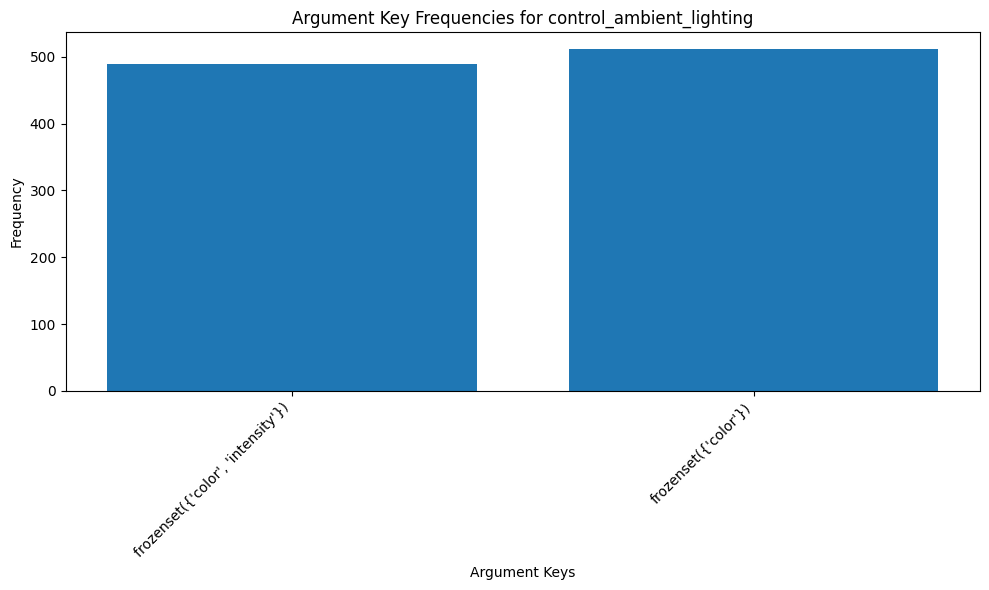

Function: control_ambient_lighting
{frozenset({'color', 'intensity'}): 489, frozenset({'color'}): 511}


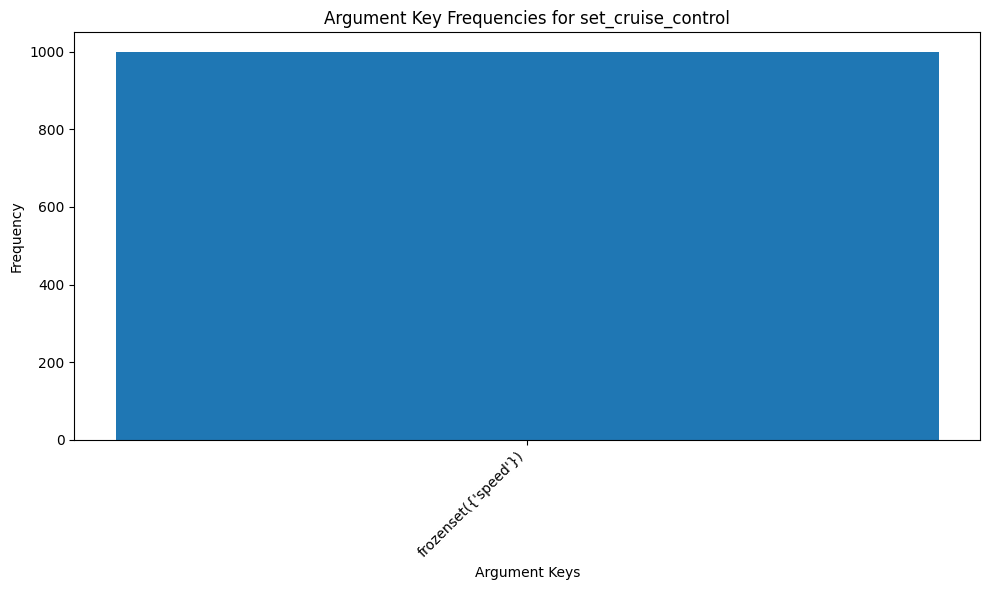

Function: set_cruise_control
{frozenset({'speed'}): 1000}


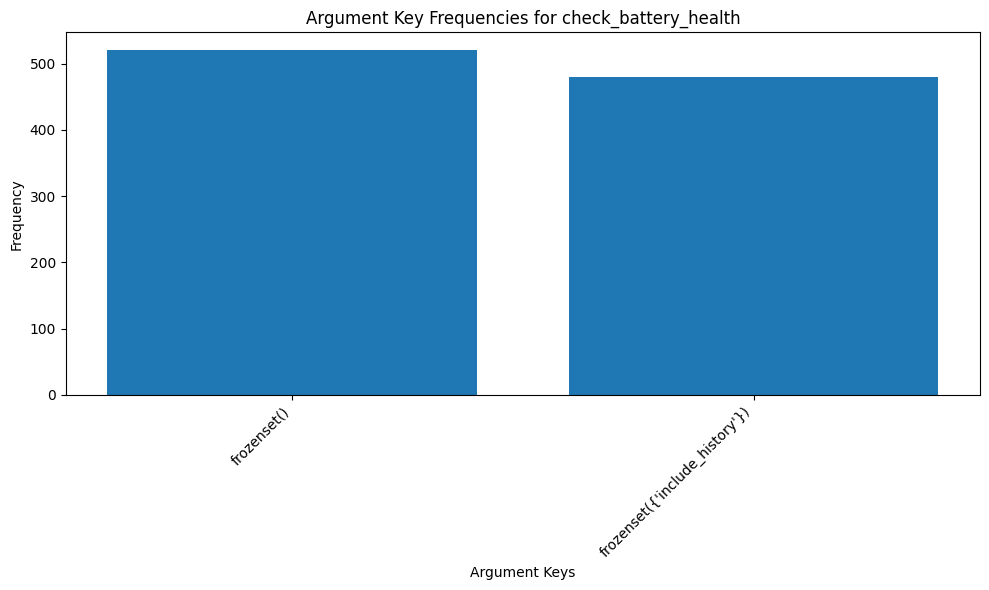

Function: check_battery_health
{frozenset(): 521, frozenset({'include_history'}): 479}


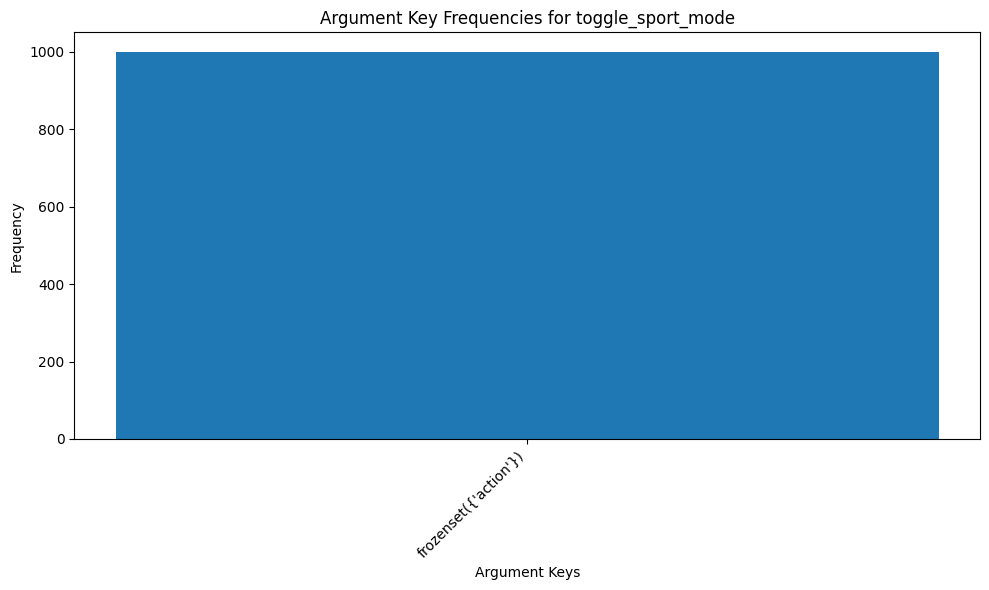

Function: toggle_sport_mode
{frozenset({'action'}): 1000}


In [18]:
import matplotlib.pyplot as plt

for fn in args_investigator:
    # Convert frozenset keys to strings for plotting
    keys = [str(key) for key in args_investigator[fn].keys()]
    values = list(args_investigator[fn].values())
    
    plt.figure(figsize=(10, 6))  # Optional: Set figure size for better readability
    plt.bar(keys, values)
    plt.xlabel('Argument Keys')
    plt.ylabel('Frequency')
    plt.title(f'Argument Key Frequencies for {fn}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()
    
    print(f"Function: {fn}")
    print(args_investigator[fn])


In [19]:
args_value_investigator = {}

for fn in data:
    args_value_investigator[fn] = {}
    for arg in data[fn]['args']:
        for key, value in arg.items():
            # Convert key to a string if it's a list or any other non-hashable type
            key_str = str(key) if isinstance(key, list) else key
            
            # Sort the value if it's a list, then convert to a string
            if isinstance(value, list):
                value_str = str(sorted(value))
            else:
                value_str = value

            if not isinstance(value, int):
                # Ensure the dictionary for this key exists
                if key_str not in args_value_investigator[fn]:
                    args_value_investigator[fn][key_str] = {}
                
                # Count the occurrences of each non-integer value
                args_value_investigator[fn][key_str][value_str] = args_value_investigator[fn][key_str].get(value_str, 0) + 1

# Example print statement to check the result (optional)
for fn, key_values in args_value_investigator.items():
    print(f"Function: {fn}")
    for key, values in key_values.items():
        print(f"  Key: {key}")
        for value, count in values.items():
            print(f"    Value: {value}, Count: {count}")


Function: set_temperature
  Key: unit
    Value: Celsius, Count: 251
    Value: Fahrenheit, Count: 262
  Key: area
    Value: ['driver', 'passenger'], Count: 23
    Value: ['driver'], Count: 28
    Value: ['driver', 'passenger', 'rear-left'], Count: 28
    Value: ['passenger', 'rear-right'], Count: 20
    Value: ['driver', 'rear-left', 'rear-right'], Count: 26
    Value: ['passenger', 'rear-left', 'rear-right'], Count: 36
    Value: ['passenger'], Count: 28
    Value: ['driver', 'passenger', 'rear-left', 'rear-right'], Count: 120
    Value: ['rear-right'], Count: 31
    Value: ['rear-left', 'rear-right'], Count: 17
    Value: ['rear-left'], Count: 24
    Value: ['driver', 'passenger', 'rear-right'], Count: 26
    Value: ['driver', 'rear-right'], Count: 26
    Value: ['driver', 'rear-left'], Count: 22
    Value: ['passenger', 'rear-left'], Count: 16
Function: adjust_fan_speed
  Key: speed
    Value: increase, Count: 474
    Value: decrease, Count: 526
  Key: area
    Value: ['driver', '